In [1]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df = pd.read_csv('2018_2019_24-59mos_underweight_complete.csv')
origfeatures = df.columns
print ("original features count", len(origfeatures))
print ("original features", origfeatures)
df.head()

original features count 42
original features Index(['age_child', 'agemos', 'AgeGroup', 'sex_child', 'gastation',
       'place_delivery', 'assistd', 'typeofd', 'pregtype', 'bw_grams',
       'bw_status', 'ethnicity', 'age_mom', 'agegroup_mom', 'csc_mom',
       'psccat_mom', 'educ_mom', 'occup_mom', 'work_status_mom', 'age_hh',
       'agegroup_HH', 'sex_hh', 'educ_hh', 'psoc_hh', 'work_status_hh',
       'urbanity', 'hhsize', 'hhsize_code', 'drinkingwater', 'recipient_4ps',
       'toilet', 'electrct1', 'drinksafe', 'makesafe', 'wcooking', 'whands',
       'collect', 'burn', 'composting', 'dump', 'segregate', 'underweight'],
      dtype='object')


,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,underweight
0,4,48,3,2,1,1,1,1,1,2400,...,0,0,2,2,0,0,1,0,0,1
1,3,34,1,2,1,1,1,1,1,2500,...,9,9,2,2,0,1,0,1,1,0
2,4,51,3,1,1,1,1,1,1,2500,...,0,0,2,2,0,0,1,0,0,1
3,4,51,3,2,1,0,1,1,1,3200,...,0,0,2,2,0,1,0,0,0,0
4,2,28,1,2,1,1,1,1,1,2800,...,9,9,2,2,0,1,0,1,0,1


In [51]:
data = df[["bw_grams","psoc_hh","drinksafe","makesafe",
               "psccat_mom","hhsize","drinkingwater","underweight"]]

In [52]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())
data = data.drop_duplicates()

'Total number of of Duplicates present in data: 4303'

In [53]:
data = data.drop_duplicates()

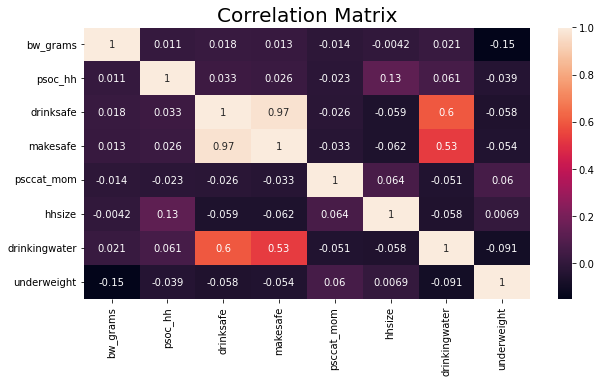

In [54]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [55]:
data['underweight'].value_counts()

0    7658
1    2529
Name: underweight, dtype: int64

In [56]:
Final = df[["bw_grams","psoc_hh","drinksafe","makesafe",
               "psccat_mom","hhsize","drinkingwater"]]
Target =df['underweight']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [58]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.788
Accuracy score : 0.7915804002760525


In [59]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))


Training score: 0.915
Accuracy score:  0.7394755003450656


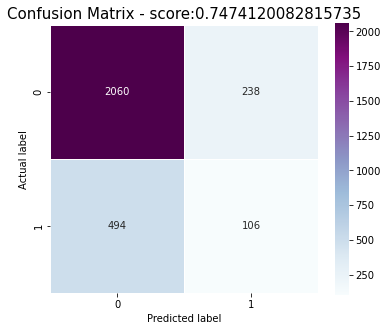

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2298
           1       0.31      0.18      0.22       600

    accuracy                           0.75      2898
   macro avg       0.56      0.54      0.54      2898
weighted avg       0.70      0.75      0.72      2898



In [60]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [61]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = data[data.underweight==0]
df_2 = data[data.underweight==1]
 
# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=6788,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.underweight.value_counts()
df_upsampled.reset_index(drop=True)

,bw_grams,psoc_hh,drinksafe,makesafe,psccat_mom,hhsize,drinkingwater,underweight
0,2500,99,9,9,2,10,1,0
1,3200,6,0,0,0,7,0,0
2,2700,8,9,9,0,8,1,0
3,3000,6,0,0,0,5,0,0
4,3500,7,9,9,0,7,1,0
...,...,...,...,...,...,...,...,...
14441,3200,99,1,4,0,6,0,1
14442,3174,7,0,0,0,9,1,1
14443,2500,9,0,0,0,5,0,1
14444,4500,9,0,0,0,7,1,1


In [62]:
df_upsampled.columns

Index(['bw_grams', 'psoc_hh', 'drinksafe', 'makesafe', 'psccat_mom', 'hhsize',
       'drinkingwater', 'underweight'],
      dtype='object')

In [63]:
Final1 =df_upsampled[["bw_grams","psoc_hh","drinksafe","makesafe",
               "psccat_mom","hhsize","drinkingwater"]]
Target1 =df_upsampled['underweight']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final1,Target1,test_size = 0.2, random_state=42)

In [65]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.582
Accuracy score : 0.5705882352941176


In [66]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)
rf_acc =accuracy_score(rf_pred,y_test)

Training score: 0.940
Accuracy score:  0.7837370242214533


Training score: 0.940
Accuracy score:  0.7837370242214533


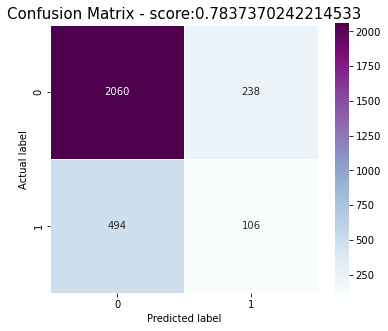

              precision    recall  f1-score   support

           0       0.70      0.87      0.77      1237
           1       0.88      0.72      0.79      1653

    accuracy                           0.78      2890
   macro avg       0.79      0.79      0.78      2890
weighted avg       0.80      0.78      0.78      2890



In [67]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(rf_pred,y_test))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)



In [69]:
df_upsampled.columns

Index(['bw_grams', 'psoc_hh', 'drinksafe', 'makesafe', 'psccat_mom', 'hhsize',
       'drinkingwater', 'underweight'],
      dtype='object')

In [70]:
#OUTLIER DETECTION in CROP
#Function to calc lowerRange and UpperRange using 1.5IQR rule
def outlier(data1):
    #Sort in Ascending
    sorted(data1)
    #Q1 and Q3
    Q1,Q3 = np.nanpercentile(data1, [25,75])
    #Calc IQR
    IQR = Q3 - Q1
    #Calc lowerRange
    lowerRange = Q1 - (1.5 * IQR)
    #Calc upperRange
    upperRange = Q3 + (1.5 * IQR)
    #Return Ranges
    return lowerRange,upperRange

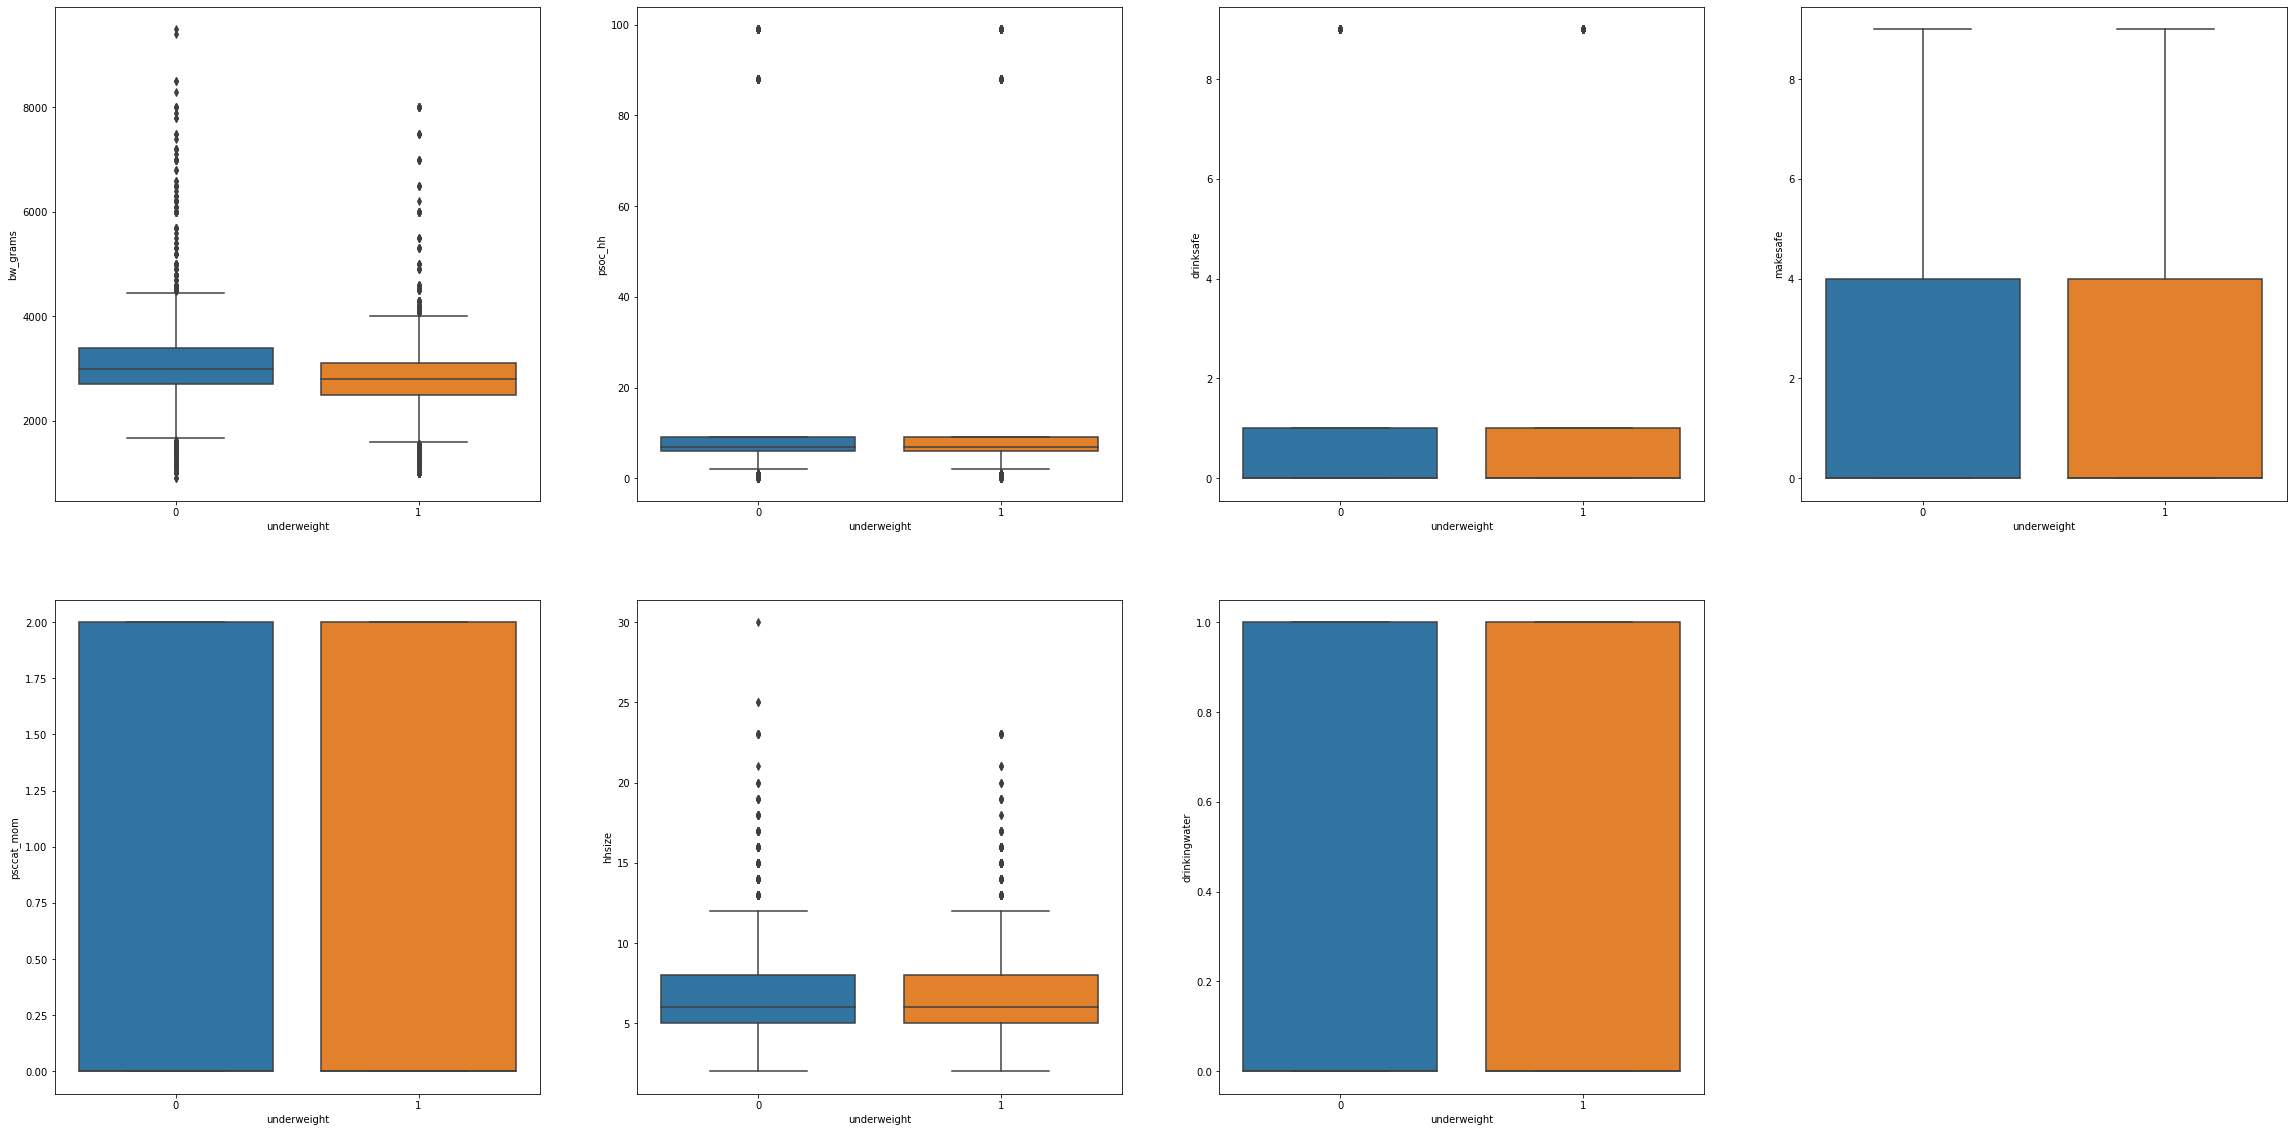

In [72]:
#Checking the outliers considering all classes of the output for each column
def graph(y):
    sns.boxplot(x="underweight", y=y, data=df_upsampled)
  
plt.figure(figsize=(40,20))
      
# Adding the subplot at the specified
# grid position
plt.subplot(2,4,1)
graph('bw_grams')
  
plt.subplot(2,4,2)
graph('psoc_hh')

plt.subplot(2,4,3)
graph('drinksafe')

plt.subplot(2,4,4)
graph('makesafe')
  
plt.subplot(2,4,5)
graph('psccat_mom')

plt.subplot(2,4,6)
graph('hhsize')

plt.subplot(2,4,7)
graph('drinkingwater')
  
plt.show()

In [73]:
lr,ur=outlier(df_upsampled['hhsize'][df_upsampled.underweight==0])
df_upsampled.drop(df_upsampled.index[(df_upsampled.hhsize > ur) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.hhsize < lr) & (df_upsampled.underweight == 0)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
0    7361
1    6788
dtype: int64

In [74]:
lr,ur=outlier(df_upsampled['hhsize'][df_upsampled.underweight==1])
df_upsampled.drop(df_upsampled.index[(df_upsampled.hhsize > ur) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.drop(df_upsampled.index[(df_upsampled.hhsize < lr) & (df_upsampled.underweight == 1)],inplace=True)
df_upsampled.value_counts('underweight')

underweight
0    7361
1    6532
dtype: int64